In [ ]:
!nvidia-smi

Sat Dec 21 16:32:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

### Getting Dataset by API

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

import roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HHesQMIUo0dHXOyGIgTs")
project = rf.workspace("sila2").project("chess_2")
version = project.version(2)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chess_2-2 in yolov8:: 100%|██████████| 3328/3328 [00:00<00:00, 7608.80it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:01<00:00, 22.4MB/s]
New https://pypi.org/project/ultralytics/8.3.52 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Chess_2-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cla

/content


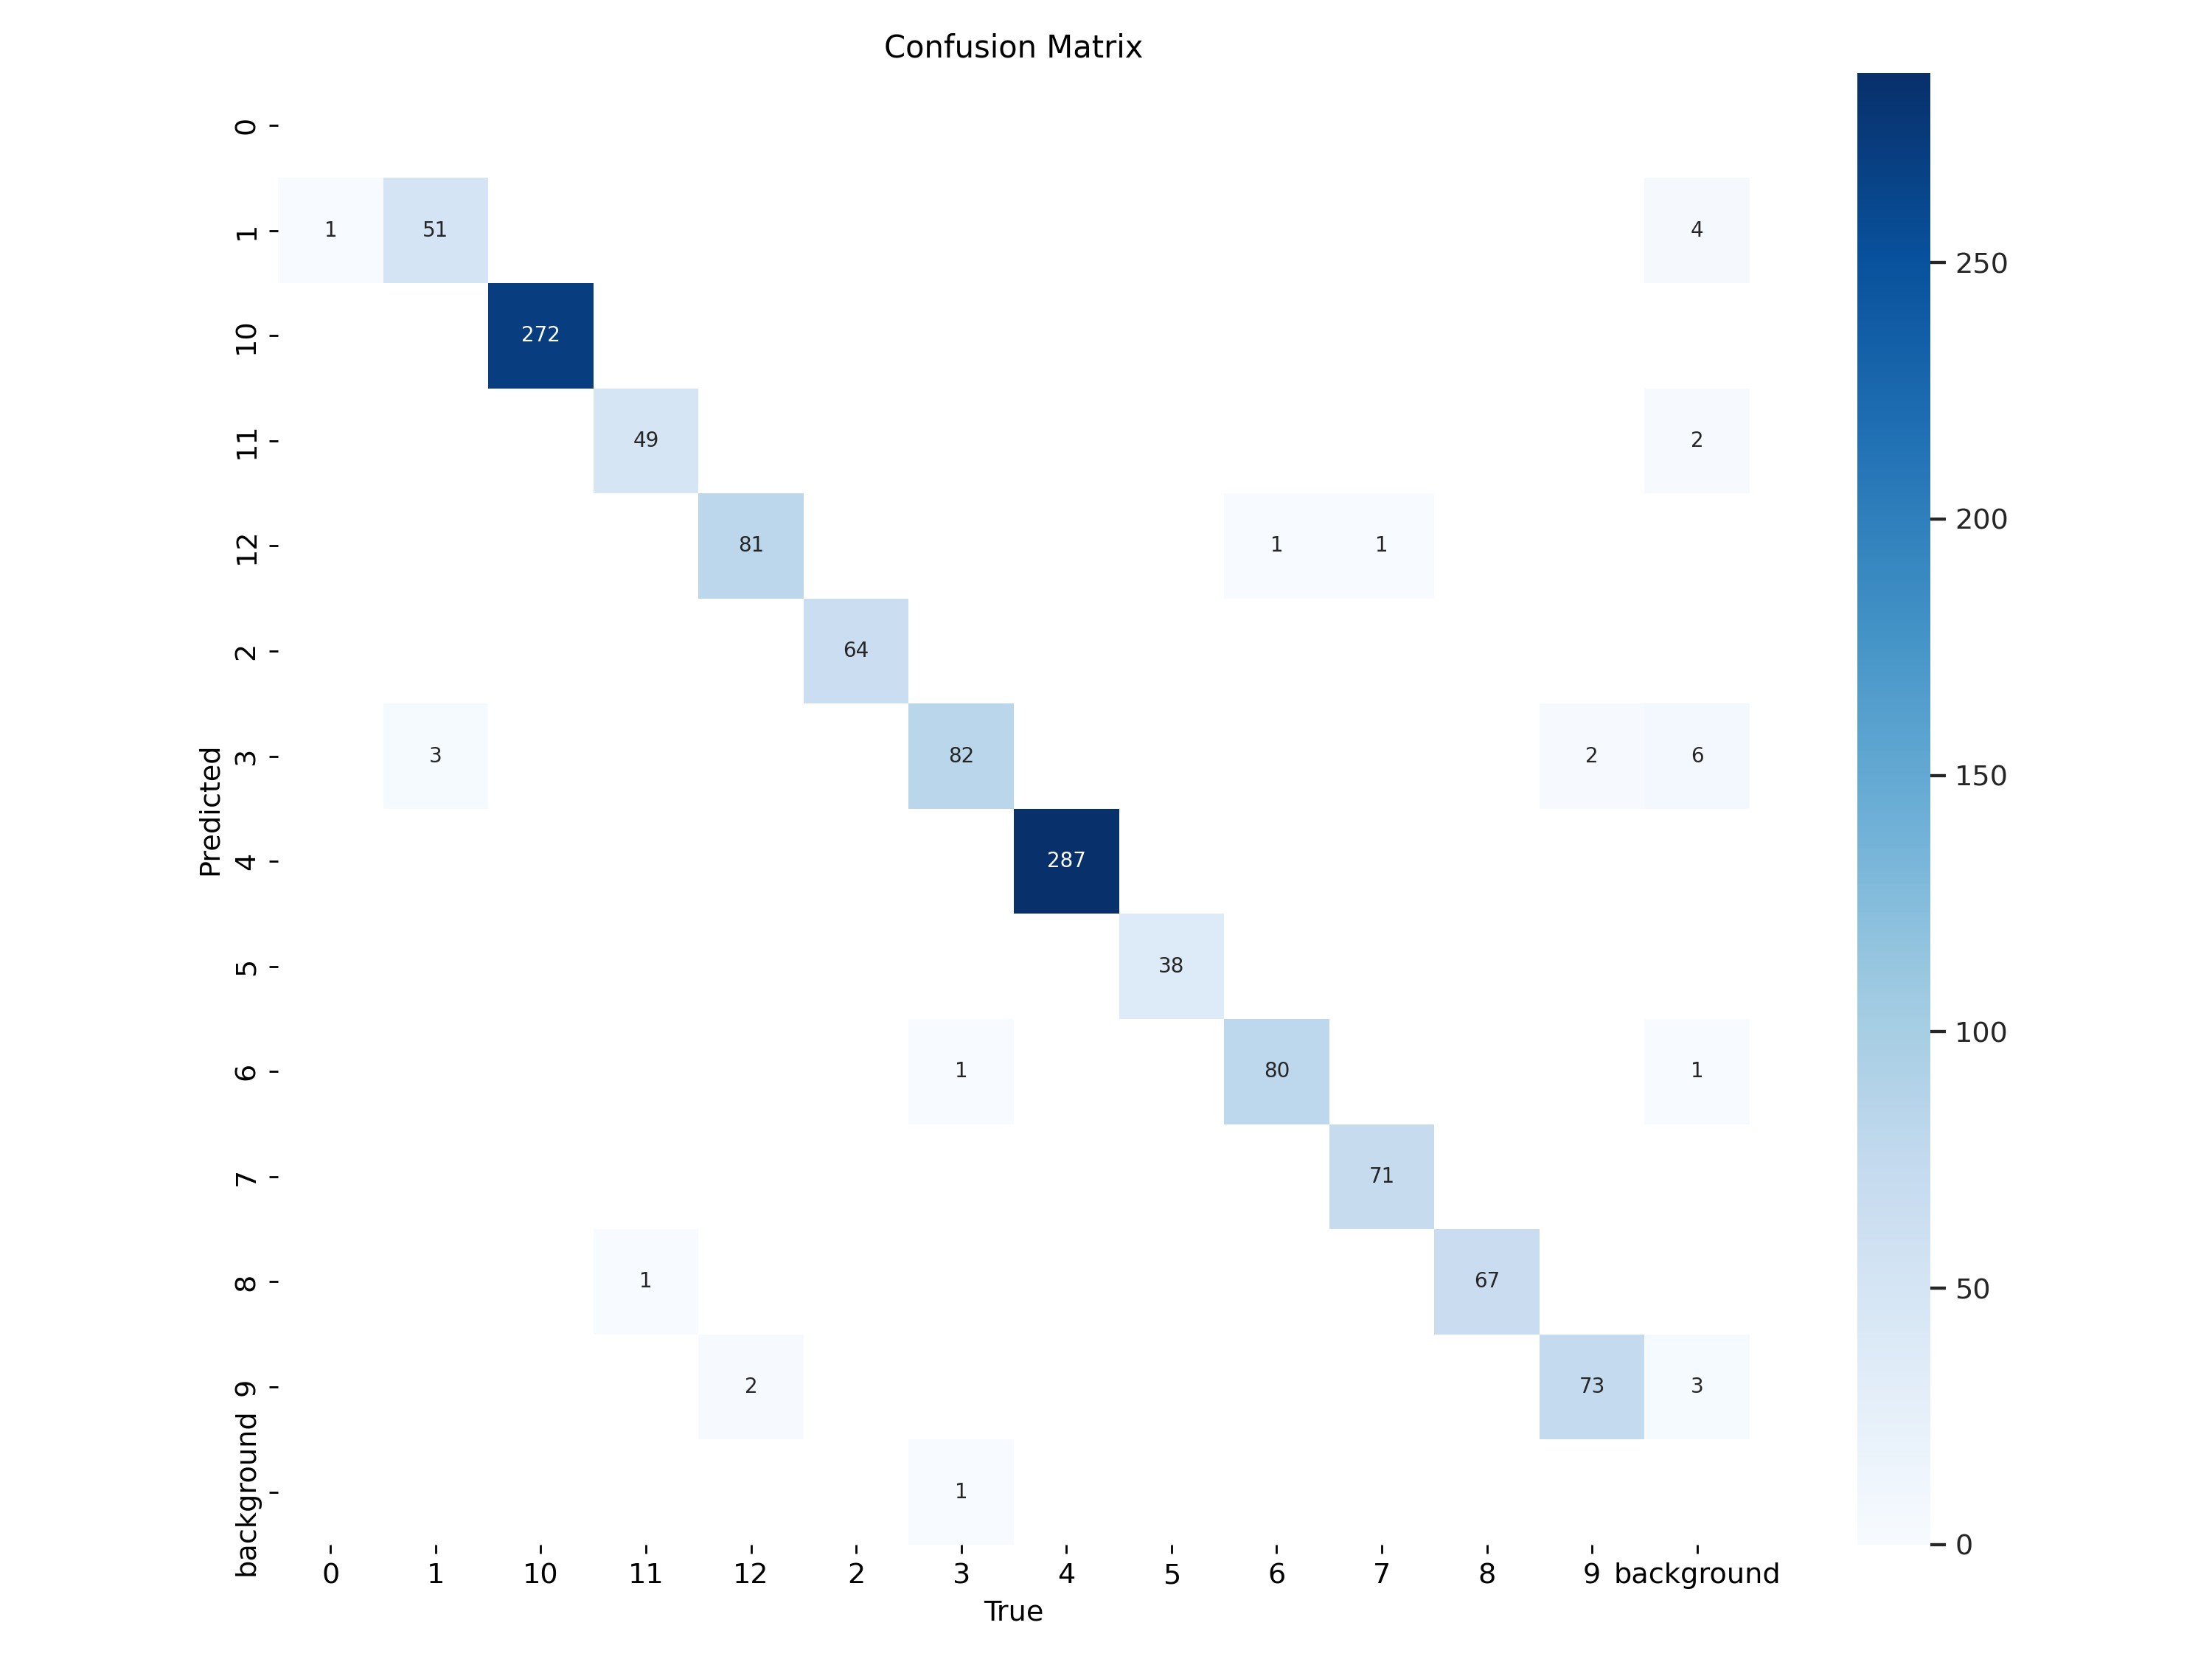

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


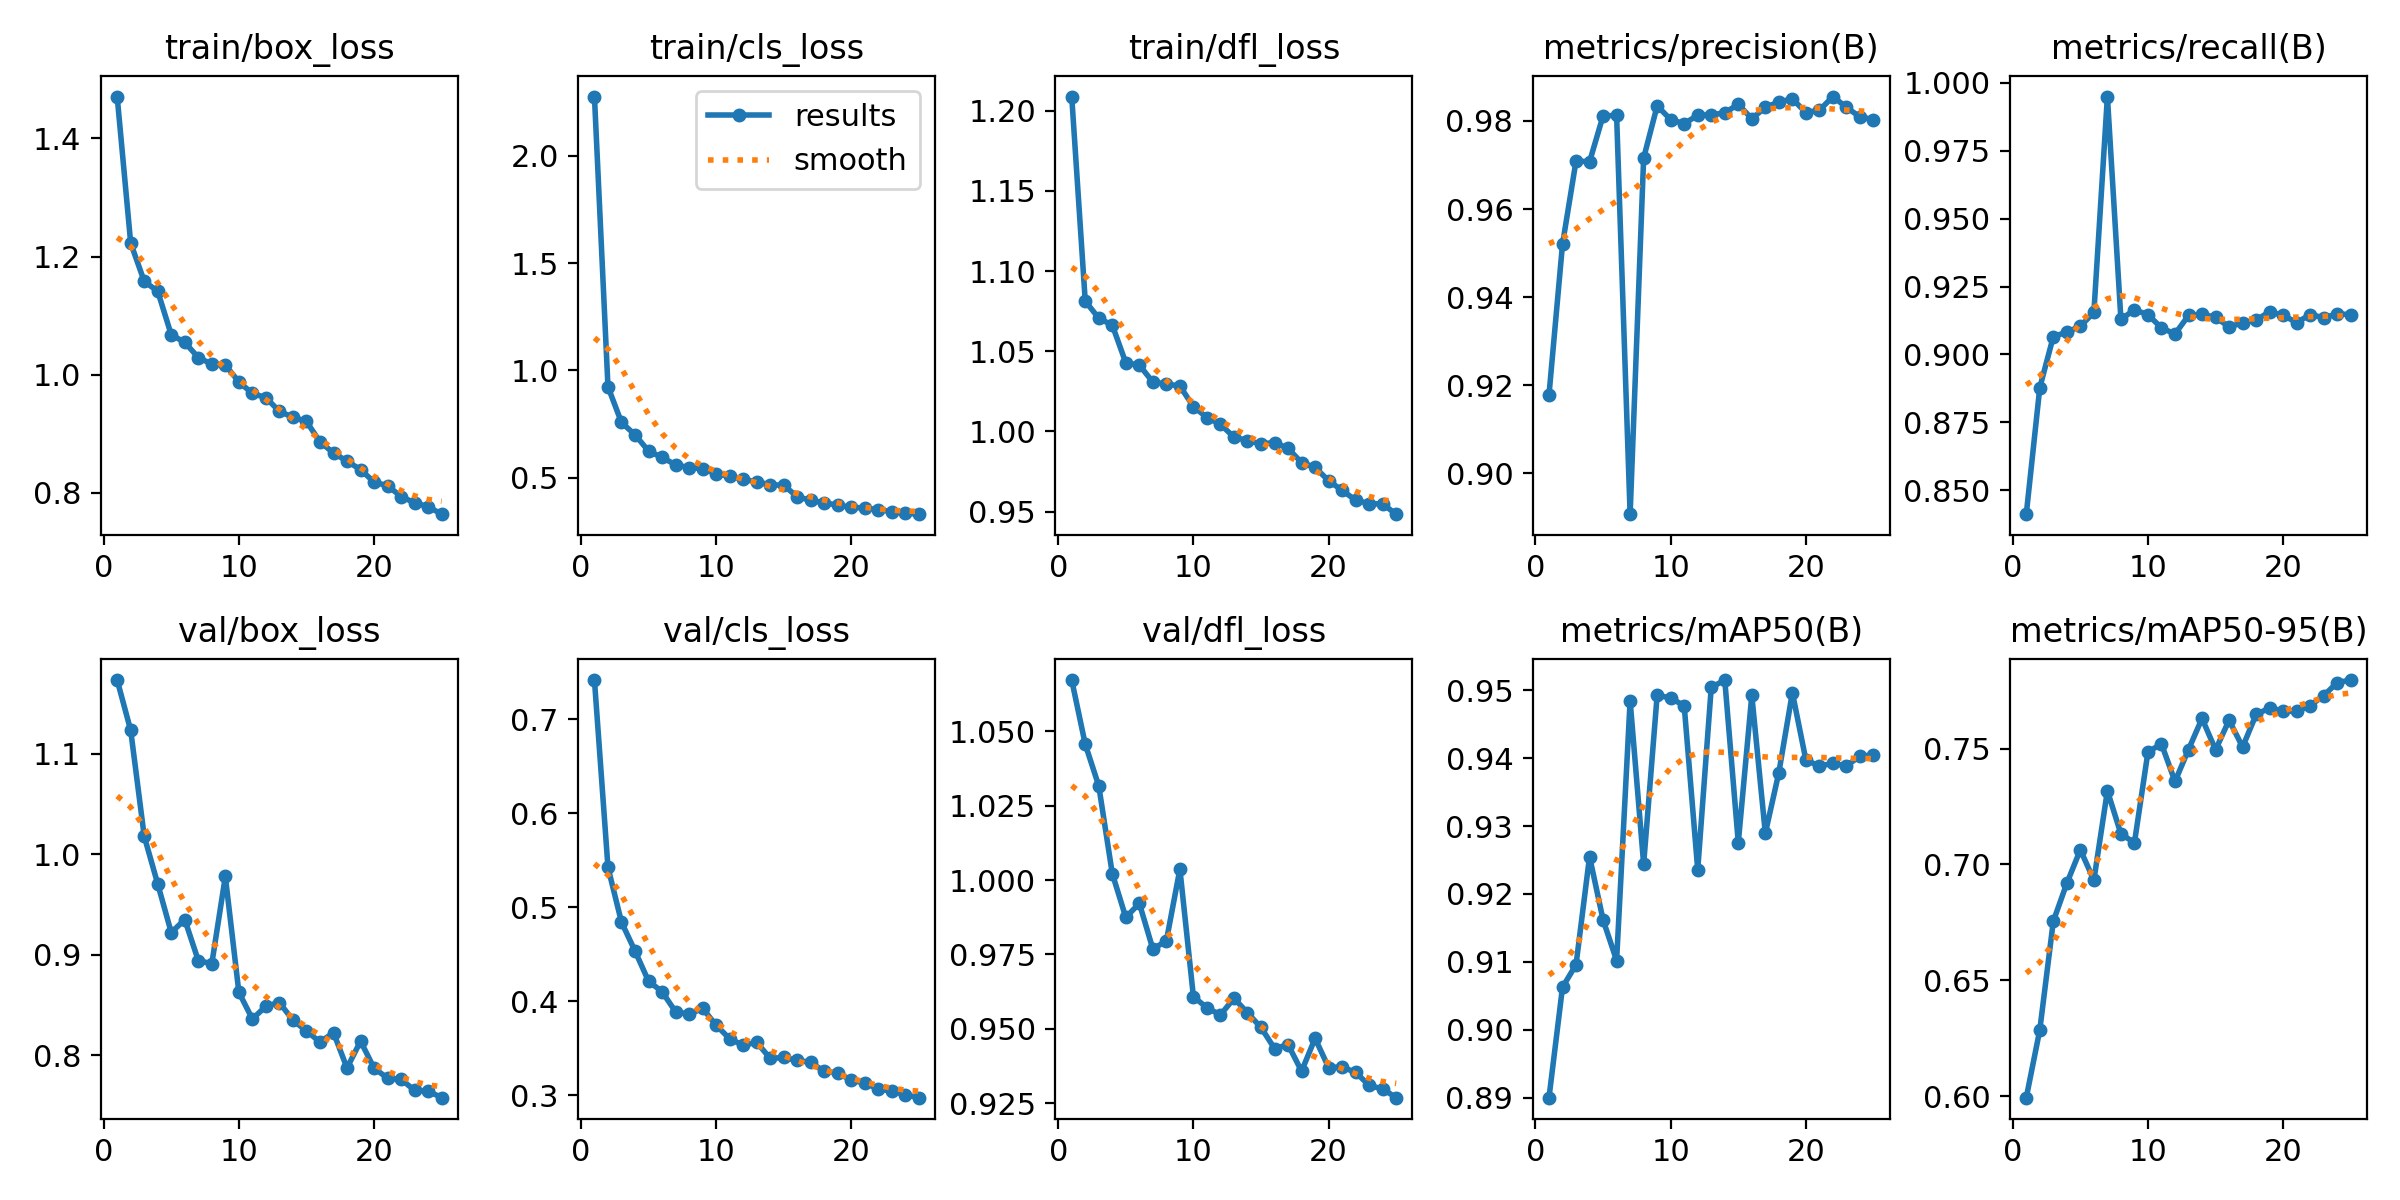

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content


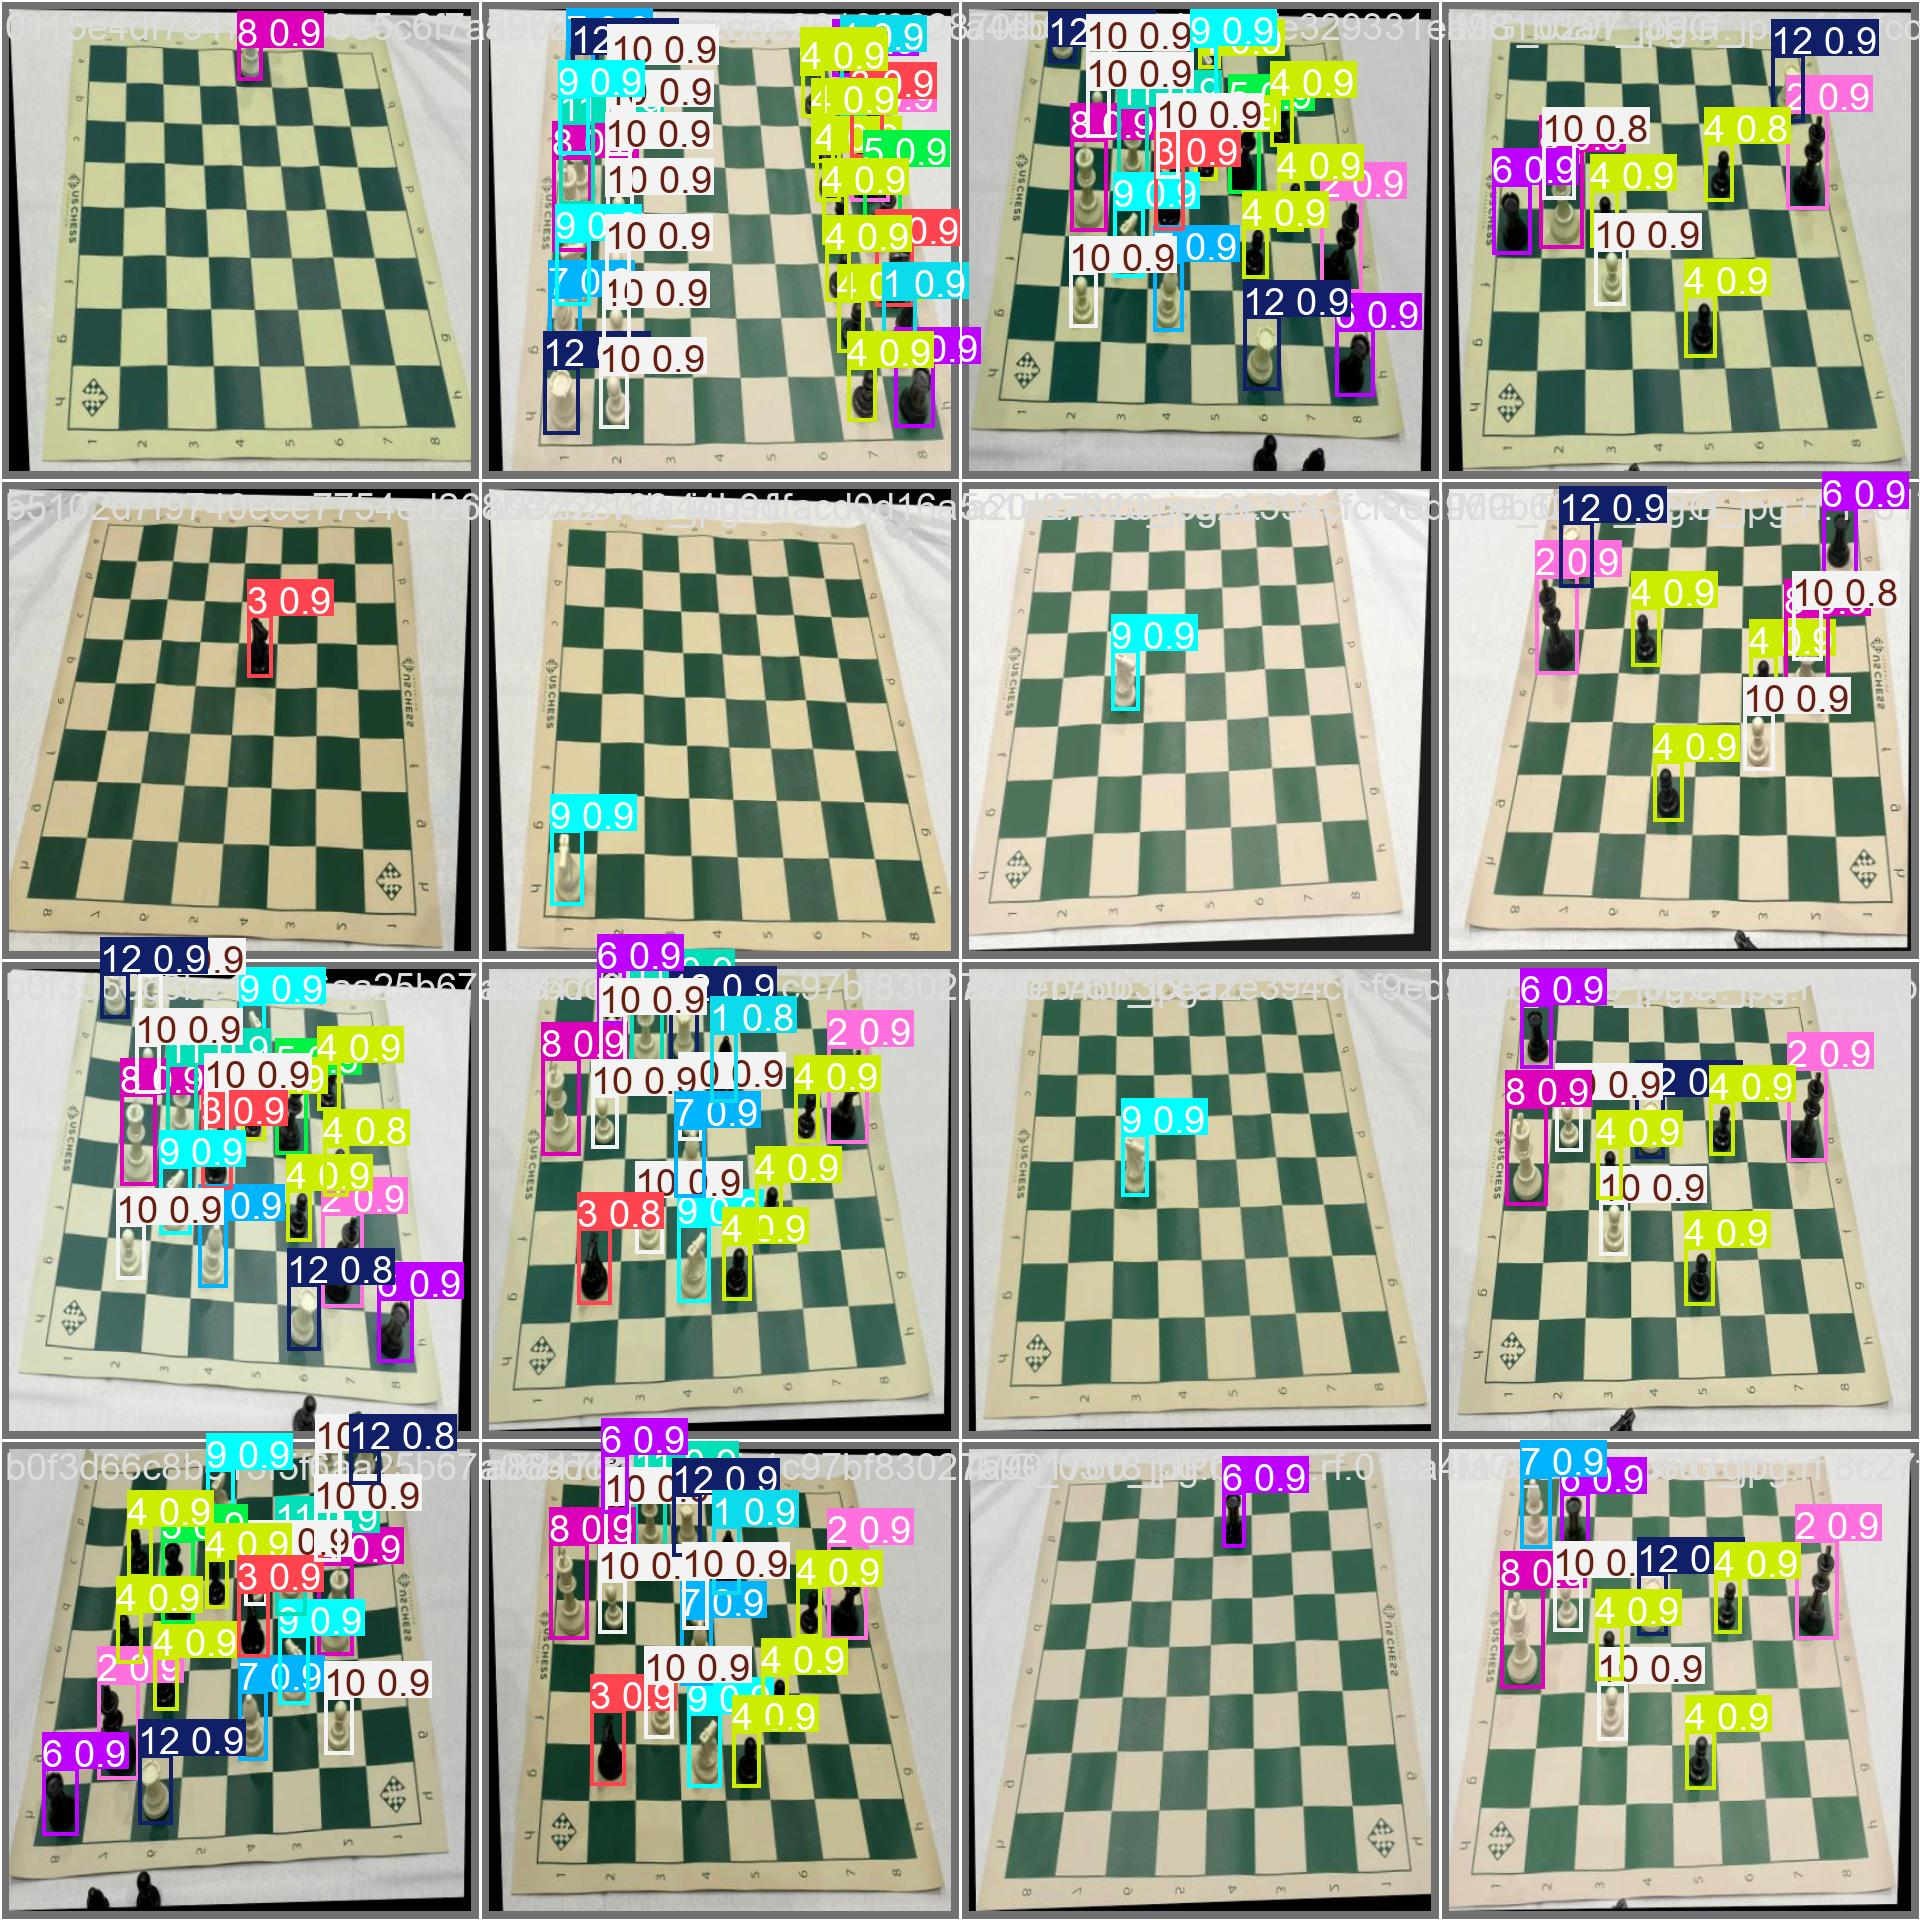

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,130,615 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Chess_2-2/valid/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100% 139/139 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:05<00:00,  1.74it/s]
                   all        139       1228       0.98      0.915       0.94      0.781
                     0          1          1          1          0      0.332      0.265
                     1         37         54      0.982      0.983      0.993      0.794
                    10         68        272      0.999          1      0.995      0.796
                    11         50         50      0.974          1      0.995      0.858
                    12         57         83      0.973      0.976      0.992      0.807
                     2        

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,130,615 parameters, 0 gradients, 28.5 GFLOPs

image 1/69 /content/datasets/Chess_2-2/test/images/04aed88a8d23cf27e47806eb23948495_jpg.rf.f793eb46312520a518f88a18309f0b46.jpg: 800x800 2 10s, 1 2, 1 4, 1 6, 1 7, 1 8, 22.6ms
image 2/69 /content/datasets/Chess_2-2/test/images/055b79dd8db4c43e1a23be6095aaf624_jpg.rf.d673db258a85c00a51bacd0c3e866fbb.jpg: 800x800 1 3, 22.5ms
image 3/69 /content/datasets/Chess_2-2/test/images/05de676d5078dc0a13796f3f627993ef_jpg.rf.5488a4fc3b46bbba76f98bbe4d6f6d2a.jpg: 800x800 1 3, 22.4ms
image 4/69 /content/datasets/Chess_2-2/test/images/05de676d5078dc0a13796f3f627993ef_jpg.rf.b16cb687e3b1f792d82338c7da5dfb92.jpg: 800x800 1 3, 22.4ms
image 5/69 /content/datasets/Chess_2-2/test/images/104ec0199cb67e1a359b1b0845ee66f3_jpg.rf.3a471e82ac4f0f365f1276792231f06b.jpg: 800x800 1 1, 22.4ms
image 6/69 /content/datasets/Chess_2-2/test/ima

**NOTE:** Let's take a look at few results.

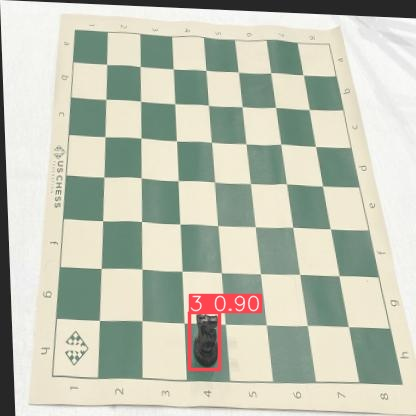

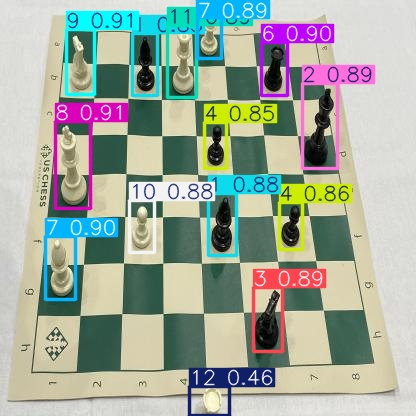

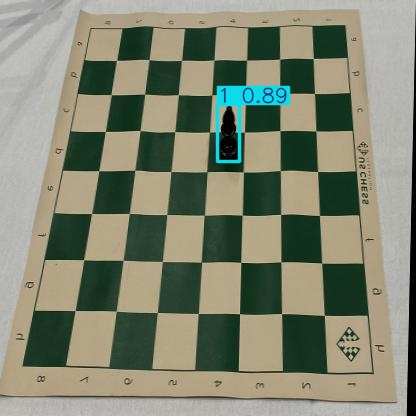

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

There will be a file named "best.pt". It contains the trained model which will be used in the moved piece detection algorithm.